

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


# *About The Dataset*


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## *Data Collection*

   ####    Import the required libraries


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import seaborn as sns

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [6]:
df.WindDir3pm.unique()

array(['SSW', 'E', 'ESE', 'W', 'ENE', 'S', 'SE', 'SSE', 'NE', 'NNE',
       'NNW', 'NW', 'WNW', 'N', 'WSW', 'SW'], dtype=object)

## *Data Pre-processing*


Here, I have dropped the <code>Date</code> column which doesnt have any effect in the prediction of rainfall.


In [7]:
df.drop('Date',axis=1,inplace=True)

#### Checking missing values in data

In [8]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Transforming Categorical Variables


To convert categorical variables to binary variables here we will be using `get_dummies()` method.


In [9]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Replacing the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. 


In [10]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

## *Exploratory Data Analysis*

In [12]:
df.RainToday.value_counts()

No     2422
Yes     849
Name: RainToday, dtype: int64

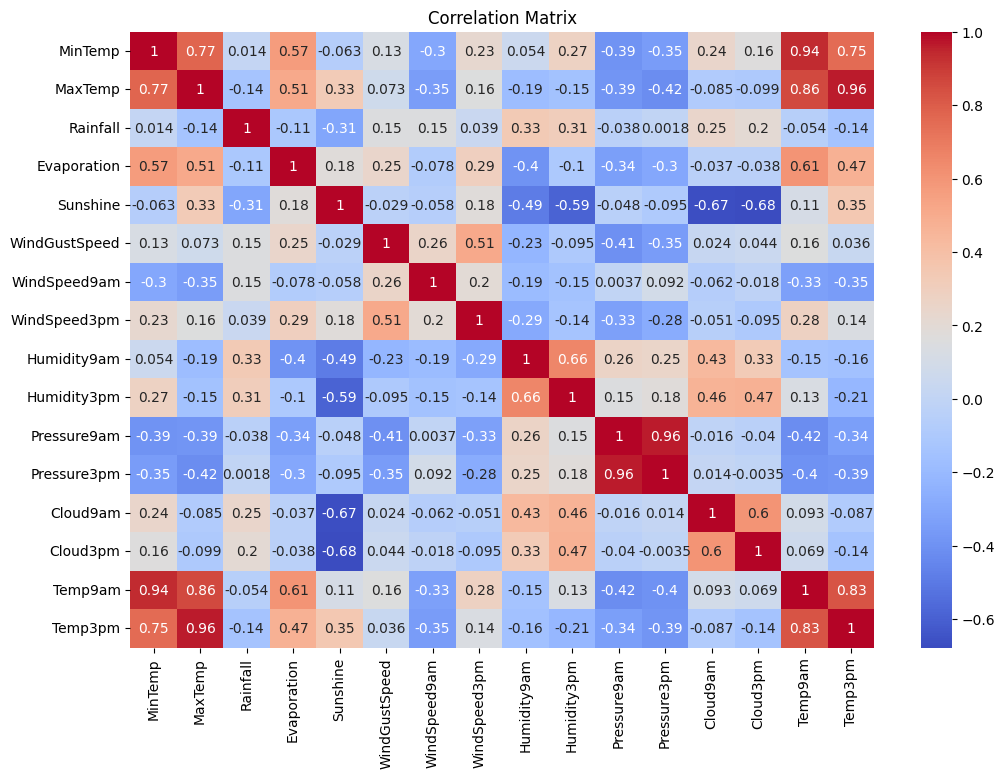

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

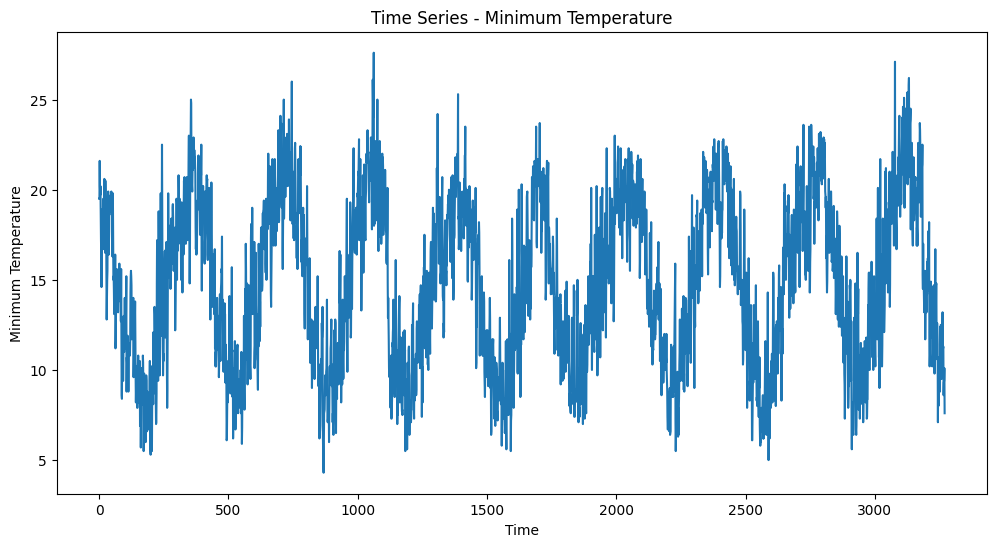

In [23]:
df.set_index(pd.Index(range(len(df))), inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MinTemp'])
plt.xlabel('Time')
plt.ylabel('Minimum Temperature')
plt.title('Time Series - Minimum Temperature')
plt.show()


Text(0.5, 1.0, 'Scatter Plot - Maximum Temperature vs. Rainfall')

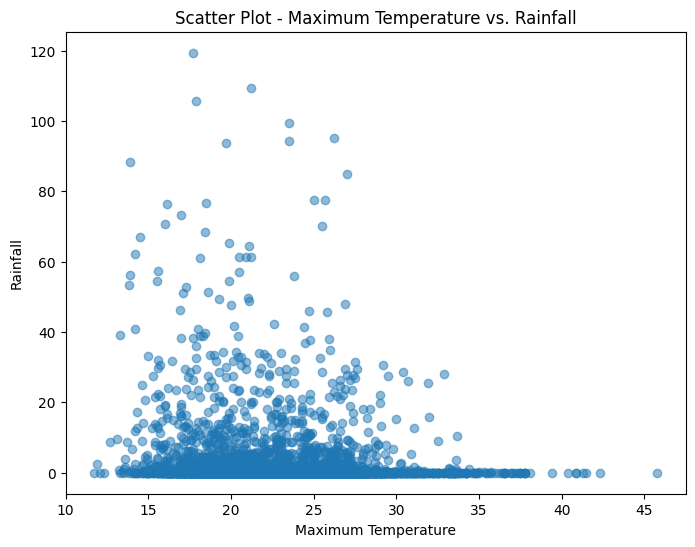

In [28]:

plt.figure(figsize=(8, 6))
plt.scatter(df['MaxTemp'], df['Rainfall'], alpha=0.5)
plt.xlabel('Maximum Temperature')
plt.ylabel('Rainfall')
plt.title('Scatter Plot - Maximum Temperature vs. Rainfall')

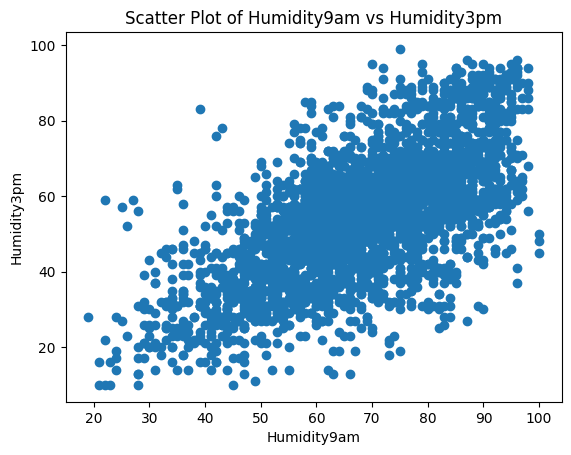

In [18]:
plt.scatter(df['Humidity9am'], df['Humidity3pm'])
plt.xlabel('Humidity9am')
plt.ylabel('Humidity3pm')
plt.title('Scatter Plot of Humidity9am vs Humidity3pm')
plt.show()

## *Data Modelling*

### Training and Testing Data


Now, we set our X or features and our Y or target variable.


In [14]:
df_sydney_processed = df_sydney_processed.astype(float)

In [15]:
X = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [16]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Using the `train_test_split` function to split the `X` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((2616, 66), (655, 66), (2616,), (655,))

### Linear Regression


Training a linear regression model using the <code>LinearRegression()</code> class and the <code>fit()</code> method. 

In [19]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [20]:
predictions = LinearReg.predict(x_test)
predictions[:5]

array([0.13181305, 0.27617455, 0.97815704, 0.28742981, 0.13241005])

##### Evaluation Metrics

In [21]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions - y_test)**2)
LinearRegression_R2 = r2_score(y_test, predictions)

In [22]:
Report = pd.DataFrame(columns=['Algorithm', 'MAE', 'MSE', 'R2'], data = [['Linear Regression', LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]])
Report

,Algorithm,MAE,MSE,R2
0,Linear Regression,0.256316,0.11572,0.427134


### KNN


Training a KNN model using the <code>KNeighborsClassifier()</code> class and the <code>fit()</code> method. 

In [23]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
predictions = KNN.predict(x_test)
predictions[:5]

array([0., 0., 1., 0., 0.])

##### Evaluation Metrics

In [25]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

In [26]:
KNN_Accuracy_Score, KNN_JaccardIndex ,KNN_F1_Score 

(0.8183206106870229, 0.4251207729468599, 0.5966101694915255)

### Decision Tree


Building a Decision Tree Classifier using the <code>DecisionTreeClassifier()</code> class and the <code>fit()</code> method. 

In [27]:
#Enter Your Code, Execute and take the Screenshot
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
predictions = Tree.predict(x_test)
predictions[:5]

array([0., 0., 1., 0., 0.])

##### Evaluation Metrics

In [29]:
Tree_Accuracy_Score = accuracy_score(predictions, y_test)
Tree_JaccardIndex = jaccard_score(predictions, y_test)
Tree_F1_Score = f1_score(predictions, y_test)

In [30]:
Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score 


(0.8183206106870229, 0.48034934497816595, 0.6489675516224188)

### Logistic Regression


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((2616, 66), (655, 66), (2616,), (655,))

Creating a logistic regression model using the <code>LogisticRegression()</code> class and the <code>fit()</code> method. 


In [32]:
LR = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [33]:
predictions = LR.predict(x_test)
predictions[:5]

array([0., 0., 0., 0., 0.])

##### Evaluation Metrics

In [34]:
LR_Accuracy_Score = accuracy_score(predictions, y_test)
LR_JaccardIndex = jaccard_score(predictions, y_test)
LR_F1_Score = f1_score(predictions, y_test)
LR_Log_Loss = log_loss(predictions, y_test)

In [35]:
LR_Accuracy_Score, LR_JaccardIndex,LR_F1_Score, LR_Log_Loss

(0.8351145038167939, 0.5045871559633027, 0.6707317073170731, 5.94307567332008)

### SVM


Creating a SVM model using the <code>SVC()</code> class and the <code>fit()</code> method. 

In [36]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train)

SVC()

In [37]:
predictions =SVM.predict(x_test)
predictions[:5]


array([0., 0., 0., 0., 0.])

##### Evaluation Metrics


In [38]:
SVM_Accuracy_Score = accuracy_score(predictions, y_test)
SVM_JaccardIndex = jaccard_score(predictions, y_test)
SVM_F1_Score = f1_score(predictions, y_test)

## *Model Evaluation*


In [39]:
Report = pd.DataFrame(columns=['Algorithm','Accuracy','Jaccard Index','F1-Score','LogLoss'], 
                      data=[['KNN',KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, '-'], 
                            ['Decision Tree',Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, '-'],
                            ['Logistic Regression',LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss],
                            ['SVM',SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score, '-']])

In [40]:
Report

,Algorithm,Accuracy,Jaccard Index,F1-Score,LogLoss
0,KNN,0.818321,0.425121,0.596610,-
1,Decision Tree,0.818321,0.480349,0.648968,-
2,Logistic Regression,0.835115,0.504587,0.670732,5.943076
3,SVM,0.722137,0.000000,0.000000,-


Logistic Regression outperformed the other algorithms with higher accuracy, Jaccard Index, and F1-Score, indicating its better predictive performance for the given classification task. SVM, on the other hand, had the lowest accuracy and failed to predict any true positives, suggesting poor performance for the task.